# 1. Лінійна регресія (1D)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

Згенеруйте синтетичний набір точок виду y = ax + b + noise.

In [321]:
points = 100
a, b = 22, 11
intensity = 10
xrange = 0, 5
# -------------------------------------------------
noise = np.random.normal(0, intensity, points)
X = np.random.uniform(xrange[0], xrange[1], points)
Y = a * X + b + noise

Візуалізуйте результат за допомогою (matplotlib).

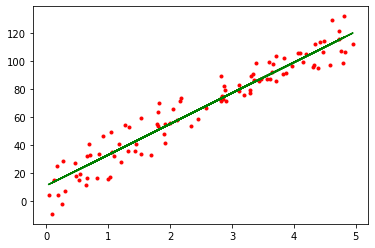

In [322]:
plt.scatter(X, Y, marker = '.', color = 'r')
plt.plot(X, a * X + b, color = 'g')

Вирішіть задачу лінійної регресії для такого набору точок. Параметри моделі знайдіть за допомогою градієнтного спуску.

In [338]:
iter_limit = 200
learn_rate = 0.05
# -------------------------------------------------
a_, b_ = 0, 0
a_hist, b_hist, e_hist = [a_], [b_], []
for it in range(0, iter_limit):
    Y_ = a_ * X + b_
    err = Y - Y_
    a_grad = -2 * (X * err).mean()
    b_grad = -2 * err.mean()
    a_ -= learn_rate * a_grad
    b_ -= learn_rate * b_grad
    a_hist.append(a_)
    b_hist.append(b_)
    e_hist.append(abs(err).sum())
e_hist.append(abs(err).sum())
print('true a = {} | {} = approx a'.format(a, a_))
print('true b = {} | {} = approx b'.format(b, b_))

true a = 22 | 22.307273540570762 = approx a
true b = 11 | 10.143997176616871 = approx b


Порівняйте знайдені параметри із значеннями (a, b).

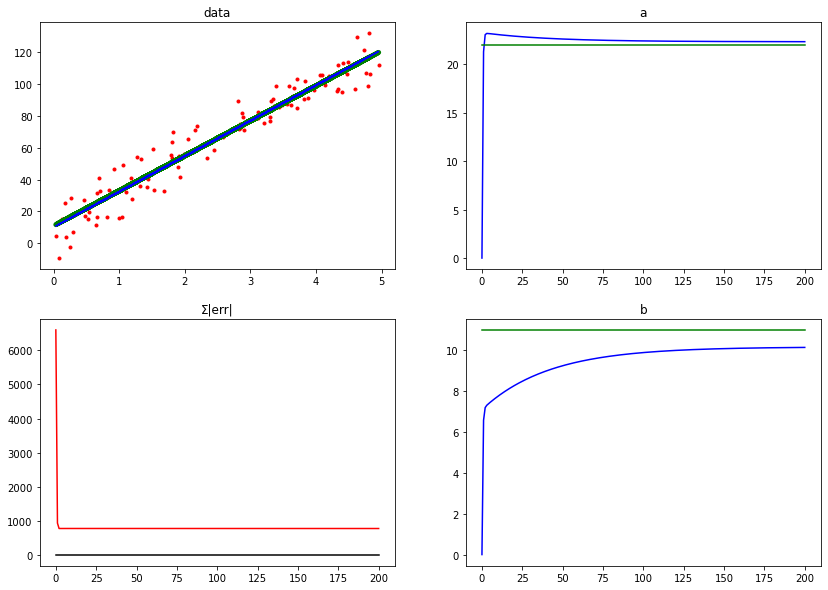

In [349]:
its = range(0, iter_limit+1)
fig = plt.figure(figsize=(14,10))
fig.add_subplot(2, 2, 1).set_title('data')
plt.scatter(X, Y, marker = '.', color = 'r')
plt.plot(X, a * X + b, color = 'g', linewidth=5)
plt.plot(X, a_ * X + b_, color = 'b')
fig.add_subplot(2, 2, 2).set_title('a')
plt.plot(its, a_hist, color='b')
plt.plot(its, np.zeros(iter_limit+1) + a, color='g')
fig.add_subplot(2, 2, 4).set_title('b')
plt.plot(its, b_hist, color='b')
plt.plot(its, np.zeros(iter_limit+1) + b, color='g')
fig.add_subplot(2, 2, 3).set_title('Σ|err|')
plt.plot(its, e_hist, color='r')
plt.plot(its, np.zeros(iter_limit+1), color='k')

# 2. Логістична регресія (2D)

Згенеруйте два синтетичних набори точок на площині, додайте ім мітки класів (0 і 1).

Візуалізуйте результат за допомогою (matplotlib).

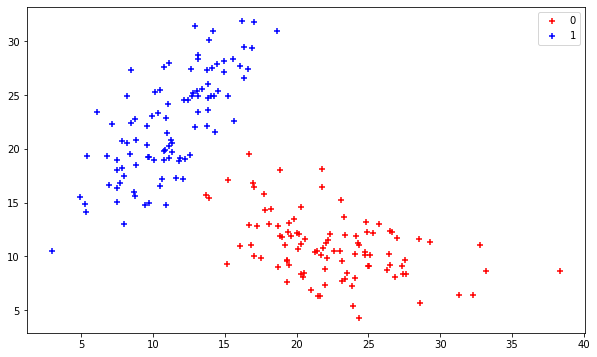

In [307]:
points = 100
mean_1 = [22, 11]
cov_1 = [[20, -5],
         [-5, 10]]
mean_2 = [11, 22]
cov_2 = [[10, 10],
         [10, 20]]
# -------------------------------------------------
pts_1 = np.random.multivariate_normal(mean_1, cov_1, points)
pts_2 = np.random.multivariate_normal(mean_2, cov_2, points)
# -------------------------------------------------
plt.figure(figsize=(10, 6))
plt.scatter(pts_1[:, 0], pts_1[:, 1], marker = '+', color='red', label='0')
plt.scatter(pts_2[:, 0], pts_2[:, 1], marker = '+', color='blue', label='1')
plt.legend()

Розділіть дані на класи за допомогою логістичної регресії.

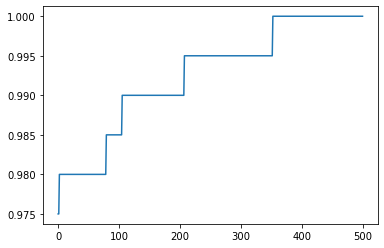

In [309]:
iter_limit = 500
learn_rate = 0.01
# -------------------------------------------------
def sigm(z): return 1 / (1 + np.exp(-z))
X = np.concatenate((pts_1, pts_2))
y = np.concatenate((np.zeros(points), np.ones(points)))
C = np.zeros(2)
acc = []
for it in range(0, iter_limit):
    z = np.dot(X, C)
    h = sigm(z)
    grad = np.dot(X.T, (h - y)) / y.size
    C -= learn_rate * grad
    y_ = sigm(np.dot(X, C))
    acc.append((np.round(y_) == y).mean())
plt.plot(range(0, iter_limit), acc)

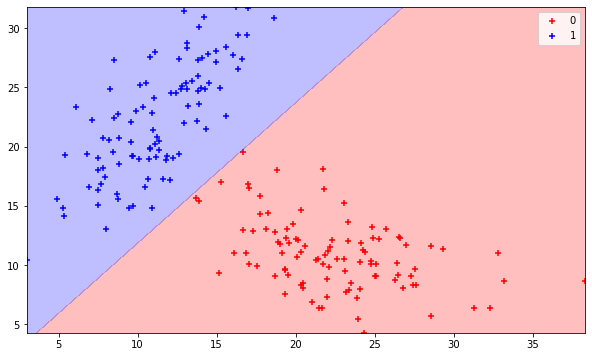

In [319]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='+', color='red', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='+', color='blue', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = sigm(np.dot(grid, C)).reshape(xx1.shape)
plt.contourf(xx1, xx2, probs, [0, 0.5, 1], colors=['red', 'blue', 'black'], alpha=0.25);

Перевірте якість алгоритма за допомогою метрики accuracy (на тестових даних).

test accuracy: 0.990575


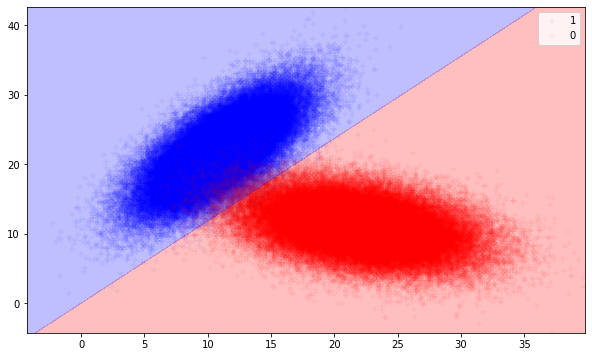

In [377]:
test_points = 100000
t_pts_1 = np.random.multivariate_normal(mean_1, cov_1, test_points)
t_pts_2 = np.random.multivariate_normal(mean_2, cov_2, test_points)
# -------------------------------------------------
tX = np.concatenate((t_pts_1, t_pts_2))
ty = np.concatenate((np.zeros(test_points), np.ones(test_points)))
# -------------------------------------------------
print('test accuracy:', (np.round(sigm(np.dot(tX, C))) == ty).mean())
plt.figure(figsize=(10, 6))
plt.scatter(tX[ty == 1][:, 0], tX[ty == 1][:, 1], marker='+', color='blue', label='1', alpha=0.05)
plt.scatter(tX[ty == 0][:, 0], tX[ty == 0][:, 1], marker='+', color='red', label='0', alpha=0.05)
plt.legend()
x1_min, x1_max = tX[:,0].min(), tX[:,0].max(),
x2_min, x2_max = tX[:,1].min(), tX[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = sigm(np.dot(grid, C)).reshape(xx1.shape)
plt.contourf(xx1, xx2, probs, [0, 0.5, 1], colors=['red', 'blue', 'black'], alpha=0.25);